![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix


filename_features = "./HAR/features.txt"
filename_labels = "./HAR/activity_labels.txt"

filename_subtrain = "./HAR/train/subject_train.txt"
filename_xtrain = "./HAR/train/X_train.txt"
filename_ytrain = "./HAR/train/y_train.txt"

filename_subtest = "./HAR/test/subject_test.txt"
ffilename_xtest = "./HAR/test/X_test.txt"
filename_ytest = "./HAR/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features['nome_var'].tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features['nome_var'].tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\rodri\AppData\Local\Temp\ipykernel_17432\2164613833.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_17432\2164613833.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features['nome_var'].tolist())
C:\Users\rodri\AppData\Local\Temp\ipykernel_17432\2164613833.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features['nome_var'].tolist())


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [3]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 188 ms
Wall time: 187 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [4]:
# Aplicando PCA sem padronização
pca_no_std = PCA()
X_train_pca_no_std = pca_no_std.fit_transform(X_train)

# Variância explicada por componente
explained_variance_no_std = pca_no_std.explained_variance_
print("Variância explicada por componente (sem padronização):")
print(explained_variance_no_std)

# Variância explicada acumulada por componente
cumulative_explained_variance_no_std = np.cumsum(explained_variance_no_std)
print("Variância explicada acumulada por componente (sem padronização):")
print(cumulative_explained_variance_no_std)

# Variância percentual por componente
explained_variance_ratio_no_std = pca_no_std.explained_variance_ratio_
print("Variância percentual por componente (sem padronização):")
print(explained_variance_ratio_no_std)

# Variância percentual acumulada por componente
cumulative_explained_variance_ratio_no_std = np.cumsum(explained_variance_ratio_no_std)
print("Variância percentual acumulada por componente (sem padronização):")
print(cumulative_explained_variance_ratio_no_std)

# Número de componentes para explicar 90% da variância
n_components_90_no_std = np.argmax(cumulative_explained_variance_ratio_no_std >= 0.9) + 1
print("Número de componentes para explicar 90% da variância (sem padronização):", n_components_90_no_std)

Variância explicada por componente (sem padronização):
[3.48236304e+01 2.73504627e+00 2.29439284e+00 1.04377529e+00
 9.43517003e-01 7.08152304e-01 6.55052596e-01 5.95090075e-01
 5.39647116e-01 4.77652868e-01 4.24368278e-01 3.74345916e-01
 3.22558940e-01 3.10568349e-01 2.77748554e-01 2.64394540e-01
 2.60087117e-01 2.40278721e-01 2.36992739e-01 2.28464121e-01
 2.19338452e-01 2.08932138e-01 1.96193981e-01 1.88919079e-01
 1.84899516e-01 1.77823828e-01 1.67998396e-01 1.62433371e-01
 1.61201621e-01 1.56947282e-01 1.54039313e-01 1.46630230e-01
 1.42127492e-01 1.31304929e-01 1.28402565e-01 1.24503411e-01
 1.24113706e-01 1.17059207e-01 1.16010916e-01 1.13996152e-01
 1.07361875e-01 1.05147999e-01 1.00861815e-01 9.99112269e-02
 9.59336404e-02 8.91833277e-02 8.74228172e-02 8.71933877e-02
 8.51572724e-02 8.36995318e-02 8.07860435e-02 7.82934140e-02
 7.61695834e-02 7.06209292e-02 6.95900524e-02 6.66596559e-02
 6.57564914e-02 6.40168729e-02 6.29522517e-02 6.10522916e-02
 5.99581230e-02 5.83972675e-02

In [5]:
# Aplicando PCA com padronização
pca_std = PCA()
X_train_pca_std = pca_std.fit_transform(X_train_pad)

# Variância explicada por componente
explained_variance_std = pca_std.explained_variance_
print("Variância explicada por componente (com padronização):")
print(explained_variance_std)

# Variância explicada acumulada por componente
cumulative_explained_variance_std = np.cumsum(explained_variance_std)
print("Variância explicada acumulada por componente (com padronização):")
print(cumulative_explained_variance_std)

# Variância percentual por componente
explained_variance_ratio_std = pca_std.explained_variance_ratio_
print("Variância percentual por componente (com padronização):")
print(explained_variance_ratio_std)

# Variância percentual acumulada por componente
cumulative_explained_variance_ratio_std = np.cumsum(explained_variance_ratio_std)
print("Variância percentual acumulada por componente (com padronização):")
print(cumulative_explained_variance_ratio_std)

# Número de componentes para explicar 90% da variância
n_components_90_std = np.argmax(cumulative_explained_variance_ratio_std >= 0.9) + 1
print("Número de componentes para explicar 90% da variância (com padronização):", n_components_90_std)

Variância explicada por componente (com padronização):
[2.84882377e+02 3.69176163e+01 1.57441103e+01 1.40471749e+01
 1.05932789e+01 9.67167599e+00 7.69137434e+00 6.72682578e+00
 5.58677186e+00 5.41413577e+00 4.82488975e+00 4.48957613e+00
 4.28601963e+00 3.62029526e+00 3.54733958e+00 3.36444093e+00
 3.29166919e+00 3.22803547e+00 3.18603707e+00 2.95812932e+00
 2.80703601e+00 2.73997116e+00 2.68273445e+00 2.62863804e+00
 2.52051275e+00 2.36196283e+00 2.34486040e+00 2.27524977e+00
 2.17962058e+00 2.17117122e+00 2.05302931e+00 1.98904447e+00
 1.95195802e+00 1.89161968e+00 1.84948796e+00 1.84128643e+00
 1.79817037e+00 1.65839981e+00 1.60851275e+00 1.59926822e+00
 1.50777907e+00 1.49012741e+00 1.47770760e+00 1.45215184e+00
 1.39719783e+00 1.38541213e+00 1.35021431e+00 1.32460557e+00
 1.29186439e+00 1.27665225e+00 1.23512396e+00 1.19754978e+00
 1.16522200e+00 1.13600604e+00 1.12076267e+00 1.10938101e+00
 1.08987505e+00 1.06723047e+00 1.05504404e+00 1.04467159e+00
 1.01802731e+00 9.95107338e-01

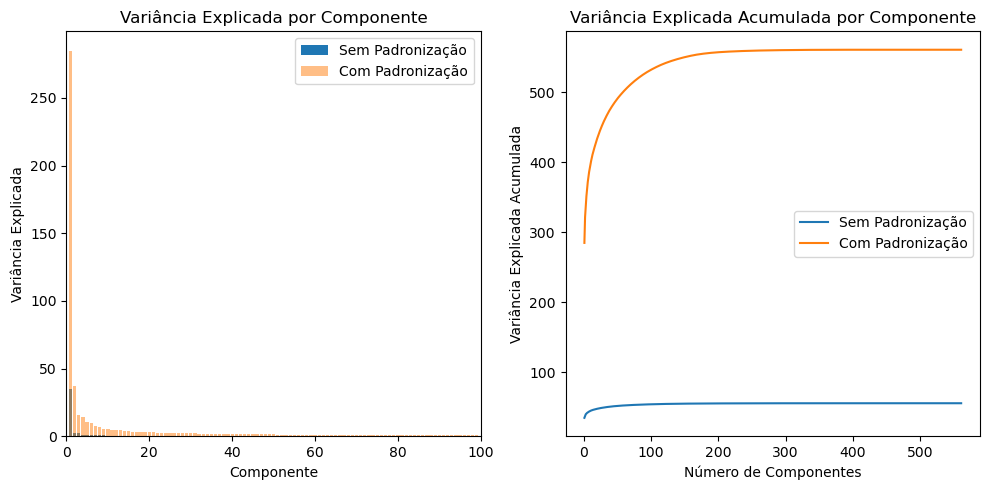

In [6]:
# Comparação da variância explicada:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras para a variância explicada por componente
axs[0].bar(range(1, len(explained_variance_no_std) + 1), explained_variance_no_std, label='Sem Padronização')
axs[0].bar(range(1, len(explained_variance_std) + 1), explained_variance_std, alpha=0.5, label='Com Padronização')
axs[0].set_xlabel('Componente')
axs[0].set_ylabel('Variância Explicada')
axs[0].set_title('Variância Explicada por Componente')
axs[0].set_xlim(0, 100)
axs[0].legend()

# Gráfico de linha para a variância explicada acumulada por componente
axs[1].plot(range(1, len(cumulative_explained_variance_no_std) + 1), cumulative_explained_variance_no_std, label='Sem Padronização')
axs[1].plot(range(1, len(cumulative_explained_variance_std) + 1), cumulative_explained_variance_std, label='Com Padronização')
axs[1].set_xlabel('Número de Componentes')
axs[1].set_ylabel('Variância Explicada Acumulada')
axs[1].set_title('Variância Explicada Acumulada por Componente')
axs[1].legend()

plt.tight_layout()
plt.show()

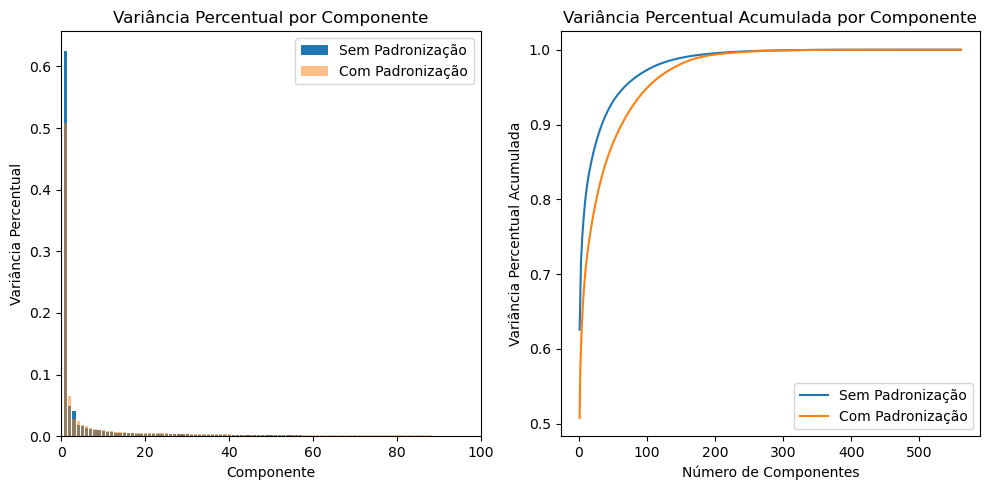

In [7]:
# Comparação da variância percentual:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras para a variância percentual por componente
axs[0].bar(range(1, len(explained_variance_ratio_no_std) + 1), explained_variance_ratio_no_std, label='Sem Padronização')
axs[0].bar(range(1, len(explained_variance_ratio_std) + 1), explained_variance_ratio_std, alpha=0.5, label='Com Padronização')
axs[0].set_xlabel('Componente')
axs[0].set_ylabel('Variância Percentual')
axs[0].set_title('Variância Percentual por Componente')
axs[0].set_xlim(0, 100)
axs[0].legend()

# Gráfico de linha para a variância percentual acumulada por componente
axs[1].plot(range(1, len(cumulative_explained_variance_ratio_no_std) + 1), cumulative_explained_variance_ratio_no_std, label='Sem Padronização')
axs[1].plot(range(1, len(cumulative_explained_variance_ratio_std) + 1), cumulative_explained_variance_ratio_std, label='Com Padronização')
axs[1].set_xlabel('Número de Componentes')
axs[1].set_ylabel('Variância Percentual Acumulada')
axs[1].set_title('Variância Percentual Acumulada por Componente')
axs[1].legend()

plt.tight_layout()
plt.show()

In [8]:
#Comparação do número de componentes:

df_comp = pd.DataFrame({
    'Sem Padronização': [n_components_90_no_std],
    'Com Padronização': [n_components_90_std]
}, index=['Número de Componentes para 90% de Variância'])

df_comp

,Sem Padronização,Com Padronização
Número de Componentes para 90% de Variância,34,63


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [9]:
%%time

# Árvore de decisão com dados padronizados
tree_std = DecisionTreeClassifier(ccp_alpha=0.001, random_state=4)
tree_std.fit(X_train_pca_std[:, :10], y_train)

# Árvore de decisão sem padronização
tree_no_std = DecisionTreeClassifier(ccp_alpha=0.001, random_state=4)
tree_no_std.fit(X_train_pca_no_std[:, :10], y_train)

CPU times: total: 219 ms
Wall time: 201 ms


DecisionTreeClassifier(ccp_alpha=0.001, random_state=4)

In [10]:
# Acurácia na base de treino
accuracy_train_std = accuracy_score(y_train, tree_std.predict(X_train_pca_std[:, :10]))
accuracy_train_no_std = accuracy_score(y_train, tree_no_std.predict(X_train_pca_no_std[:, :10]))

# Acurácia na base de teste
accuracy_test_std = accuracy_score(y_test, tree_std.predict(pca_std.transform(X_test)[:, :10]))
accuracy_test_no_std = accuracy_score(y_test, tree_no_std.predict(pca_no_std.transform(X_test)[:, :10]))

In [11]:
df_accuracy = pd.DataFrame({
    'Com Padronização': [accuracy_train_std, accuracy_test_std],
    'Sem Padronização': [accuracy_train_no_std, accuracy_test_no_std]
}, index=['Acurácia Treino', 'Acurácia Teste'])

df_accuracy

,Com Padronização,Sem Padronização
Acurácia Treino,0.858678,0.892682
Acurácia Teste,0.218188,0.823889


#### Em geral, os resultados sem a padronização se saíram melhores.